In [1]:
df = read.csv("./Walmart_Sales_Updated.csv")

In [2]:
#Conferir se já não foi alterado e converter coluna 'Date pata formato Date
if ( class(df$Date) != "Date" ) {
  df$Date = as.Date(df$Date, format = "%Y-%m-%d")
}


In [3]:
head(df)

X,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_CPI
1,1,2010-02-05,1643691,0,42.31,2.572,211.0964,8.106,NA
2,1,2010-02-12,1641957,1,38.51,2.548,211.2422,8.106,0.06907348
3,1,2010-02-19,1611968,0,39.93,2.514,211.2891,8.106,0.02223661
4,1,2010-02-26,1409728,0,46.63,2.561,211.3196,8.106,0.01443520
5,1,2010-03-05,1554807,0,46.50,2.625,211.3501,8.106,0.01443311
6,1,2010-03-12,1439542,0,57.79,2.667,211.3806,8.106,0.01443103


Estudando o efeito da temperatura

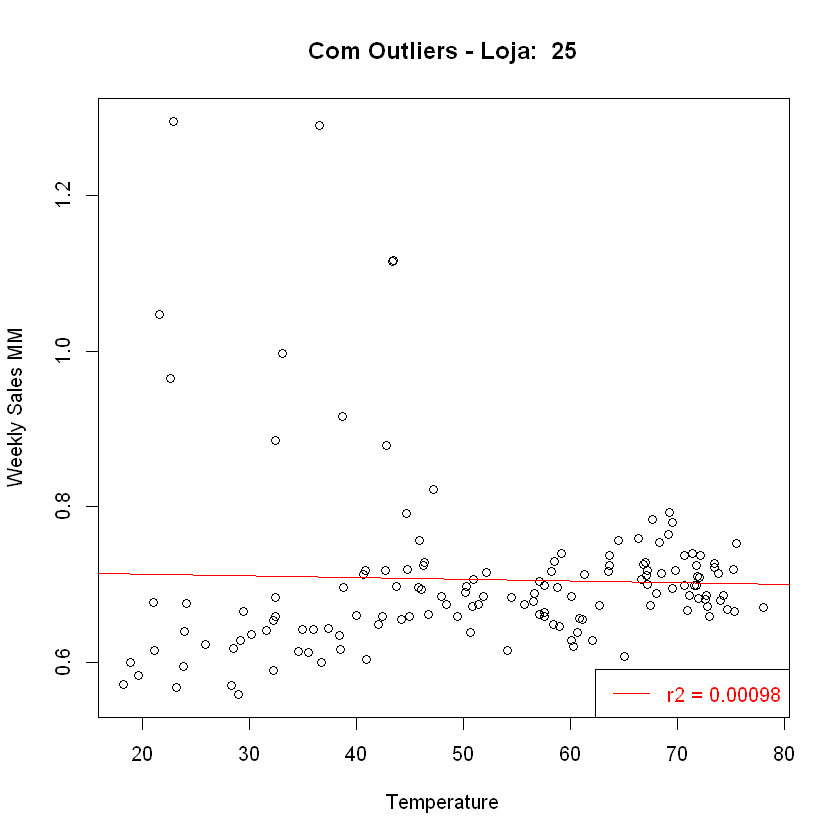

In [4]:
nstore = 25
if (nstore > 0){
    dfplot = df[(df$Store == nstore),]
} else {
    dfplot = df
}


plot(dfplot$Temperature,dfplot$Weekly_Sales/1000000,
    ylab = 'Weekly Sales MM',
    xlab = 'Temperature',
    main = paste( 'Com Outliers - Loja: ', nstore))
lm_model = lm(dfplot$Weekly_Sales/1000000 ~ dfplot$Temperature)
abline(lm_model, col="red")

r_squared = summary(lm_model)$r.squared
legend("bottomright", legend=paste("r2 =", round(r_squared, 5)), 
       lty=1, col="red", text.col="red")


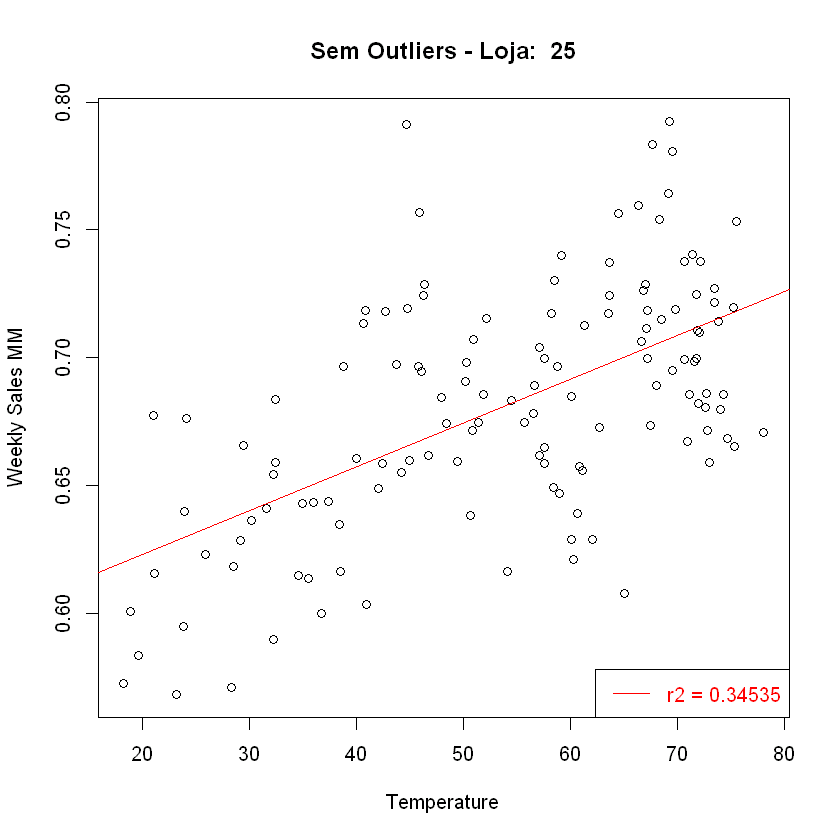

In [5]:


# Calculate Q1, Q3, and IQR
if (nstore > 0){
    Q1 <- quantile(df[df$Store == nstore,]$Weekly_Sales, 0.25)
    Q3 <- quantile(df[df$Store == nstore,]$Weekly_Sales, 0.75)
    } else {
    Q1 <- quantile(df$Weekly_Sales, 0.25)
    Q3 <- quantile(df$Weekly_Sales, 0.75) 
    }

IQR <- Q3 - Q1

# Define outlier bounds
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

if (nstore > 0){
   dfplot = df[(df$Store == nstore) & (df$Weekly_Sales > lower_bound) & (df$Weekly_Sales < upper_bound),]
} else {
    dfplot = dfplot = df[(df$Weekly_Sales > lower_bound) & (df$Weekly_Sales < upper_bound),]
}



plot(dfplot$Temperature,dfplot$Weekly_Sales/1000000,
    ylab = 'Weekly Sales MM',
    xlab = 'Temperature',
    main = paste( 'Sem Outliers - Loja: ', nstore))
lm_model = lm(dfplot$Weekly_Sales/1000000 ~dfplot$Temperature)
abline(lm_model, col="red")
r_squared = summary(lm_model)$r.squared
legend("bottomright", legend=paste("r2 =", round(r_squared, 5)), 
       lty=1, col="red", text.col="red")


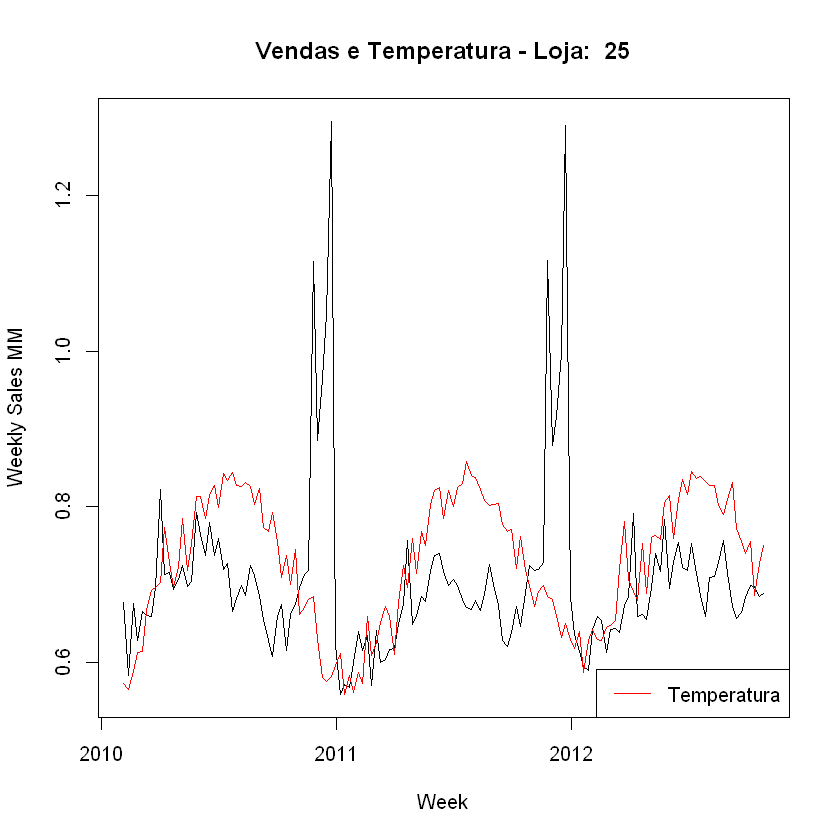

In [6]:
dfplot = df[(df$Store == nstore),]

minT = min(dfplot[dfplot$Store == nstore,]$Temperature/200)
minS =  min(dfplot[dfplot$Store == nstore,]$Weekly_Sales/1000000)
minD = minT - minS

plot(dfplot$Date,dfplot$Weekly_Sales/1000000,
    type='l',
    ylab = 'Weekly Sales MM',
    xlab = 'Week',

    main = paste( 'Vendas e Temperatura - Loja: ', nstore))
lines(dfplot$Date,(dfplot$Temperature/200)- minD,
      col = "red")
legend("bottomright", legend="Temperatura", lty=1, col="red", text.col="black")


A correlação direta entre a tempeatura e as vendas é fraca. 
Agora será verificada am distribuição de vendas por quartis de temperatura.

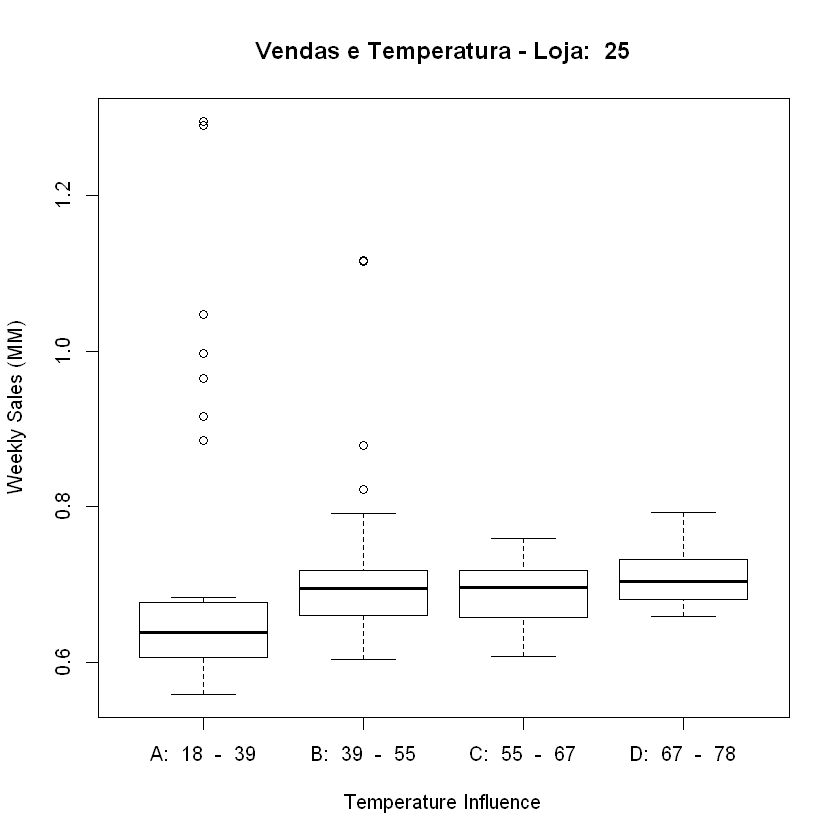

In [7]:
Q0_Temp = min(dfplot[dfplot$Store == nstore,]$Temperature)
Q1_Temp = quantile(dfplot[dfplot$Store == nstore,]$Temperature, 0.25)
Q2_Temp = quantile(dfplot[dfplot$Store == nstore,]$Temperature, 0.50)
Q3_Temp = quantile(dfplot[dfplot$Store == nstore,]$Temperature, 0.75)
Q4_Temp = max(dfplot[dfplot$Store == nstore,]$Temperature, na.rm = TRUE)
dfplot$Temp_Quantile = ''

label_1 = paste("A: ",round(Q0_Temp, 0)," - ",round(Q1_Temp, 0))
label_2 = paste("B: ",round(Q1_Temp, 0)," - ",round(Q2_Temp, 0))
label_3 = paste("C: ",round(Q2_Temp, 0)," - ",round(Q3_Temp, 0))
label_4 = paste("D: ",round(Q3_Temp, 0)," - ",round(Q4_Temp, 0))

dfplot$Temp_Quantile = ifelse(dfplot$Temperature <= Q1_Temp,label_1, dfplot$Temp_Quantile)
dfplot$Temp_Quantile = ifelse(dfplot$Temperature > Q1_Temp & dfplot$Temperature <= Q2_Temp ,label_2, dfplot$Temp_Quantile)
dfplot$Temp_Quantile = ifelse(dfplot$Temperature > Q2_Temp & dfplot$Temperature <= Q3_Temp ,label_3, dfplot$Temp_Quantile)
dfplot$Temp_Quantile = ifelse(dfplot$Temperature > Q3_Temp,label_4, dfplot$Temp_Quantile)

bp = boxplot(Weekly_Sales/1000000 ~ Temp_Quantile, 
        data = dfplot,
        ylab = 'Weekly Sales (MM)',
        xlab = 'Temperature Influence',
        main = paste( 'Vendas e Temperatura - Loja: ', nstore)
       )




Aqui podemos ver uma tendência de aumento de vendas no extremo mais quente e uma redução no extremo mais, frio.

In [8]:
print(bp$stats)

          [,1]      [,2]      [,3]      [,4]
[1,] 0.5587946 0.6033936 0.6078193 0.6591095
[2,] 0.6069749 0.6611321 0.6579409 0.6813173
[3,] 0.6381248 0.6954231 0.6964217 0.7045945
[4,] 0.6767462 0.7188143 0.7178737 0.7322748
[5,] 0.6836654 0.7913569 0.7594079 0.7924425


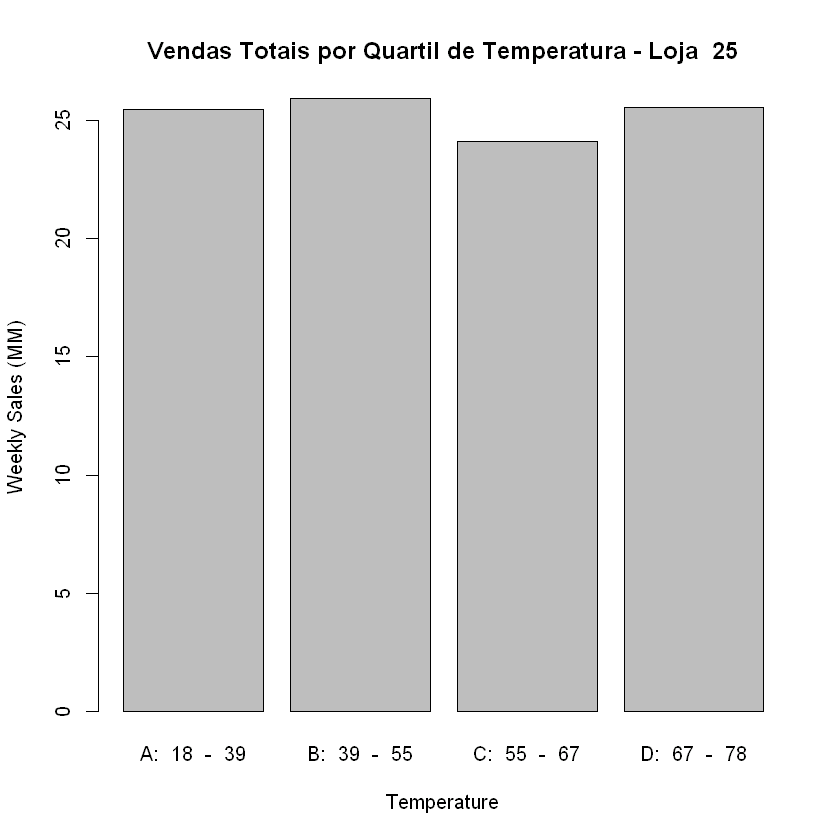

In [9]:
sums <- aggregate(Weekly_Sales ~ Temp_Quantile, dfplot, sum)

# Create barplot
barplot(sums$Weekly_Sales/1000000, 
        names.arg = sums$Temp_Quantile,
        main = paste("Vendas Totais por Quartil de Temperatura - Loja ", nstore),
        xlab = "Temperature",
        ylab = "Weekly Sales (MM)"
        )